In [1]:
import json
import os

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sns.set()

In [3]:
def collect_csv_results(dirpath):
    out = {}
    for filename in os.listdir(resultspath):
        with open(os.path.join(resultspath, filename), 'r') as f:
            data = json.loads(f.read())
            out[os.path.splitext(filename)[0]] = data
    return out

In [7]:
results = {}

# Collect reference results from compressai
resultspath = '/home/begaintj/dev/compressai/results/video/UVG-1080p'
results.update(collect_csv_results(resultspath))
        
# Paper results (Approximate)
results['google2020_flow_mse'] = {"rgb_psnr": [34.2, 35.2, 35.6, 36.5, 37.8], "bpp": [0.05, 0.08, 0.14, 0.2, 0.29]}
results['google2020_ssf_mse'] = {"rgb_psnr": [34.4, 35.8, 36.95, 38.4, 39.4], "bpp": [0.04, 0.07, 0.11, 0.21, 0.37]}

#Custom results
# results['vimeo-256x256'] = {"mse": 22.67339175088065,"rgb_psnr": 34.76435797555106,"bpp": 0.266093016735145}
# results['vimeo-256x256-intervals-123'] = {"mse": 20.904899052211217, "rgb_psnr": 35.13710076468332, "bpp": 0.24282055028847285}
# results['vimeo-256x256-intervals-23'] = {
#   "mse": 20.732722282409668,
#   "rgb_psnr": 35.13774980817522,
#   "bpp": 0.23411918325083597
# }
# results['vimeo-256x384-intervals-123 (finetuning)'] = {
#   "mse": 19.045440128871373,
#   "rgb_psnr": 35.502778734479634,
#   "bpp": 0.21043881454638072
# }

# results['vimeo-256x384-random (finetuning)'] = {
#   "mse": 19.11886501312256,
#   "rgb_psnr": 35.483741760253906,
#   "bpp": 0.21234250547630446
# # }

# results['clic2021-384x384-123 (finetuning)'] = {
#   "mse": 18.79057080405099,
#   "rgb_psnr": 35.525399344308035,
#   "bpp": 0.19454030426485197
# }

# results['1e-4 clic2021-384x384-123 (finetuning)'] = {
#   "mse": 21.00205271584647,
#   "rgb_psnr": 35.097272055489675,
#   "bpp": 0.2135826913373811
# }

results['AI clic2021-384x384-123 (finetuning)'] = {
  "mse": 14.907398496355329,
  "rgb_psnr": 36.57929883684431,
  "bpp": 0.18288199603557587
}

results['intraswitch clic2021-384x384-123 (finetuning)'] = {
  "mse": 15.541556085859026,
  "rgb_psnr": 36.412562234061106,
  "bpp": 0.15006830915808678
}

results['gop12 clic2021-384x384-123 (finetuning)'] = {
  "mse": 16.799126352582658,
  "rgb_psnr": 36.043082101004465,
  "bpp": 0.1812961766762393
}

# results['clic2021-384x384-3 (finetuning)'] = {
#   "mse": 18.55353546142578,
#   "rgb_psnr": 35.583647046770366,
#   "bpp": 0.20361553771155222
# }

# results['clic2021-384x384-1 (finetuning)'] = {
#   "mse": 18.70887007032122,
#   "rgb_psnr": 35.55028969900949,
#   "bpp": 0.19306271523237228
# }

results['clic2021-256x256-123'] = {
  "mse": 19.268477848597936,
  "rgb_psnr": 35.42971910749163,
  "bpp": 0.25204044367585865
}

results['mbt2018-mean'] = {
    "rgb_psnr": [34.26852471487863,],
    "bpp": [0.21070696200643266],
}

results['mbt2018'] = {
    "rgb_psnr": [34.5239988054548,],
    "bpp": [0.19951576633112772],
}

results['SSF clic2021-256x256-123'] = {
  "mse": 16.95634365081787,
  "rgb_psnr": 35.98314339773996,
  "bpp": 0.20673418364354543
}
results['SSF (intraswitch) clic2021-256x256-123'] = {
  "mse": 15.669968605041504,
  "rgb_psnr": 36.33302525111607,
  "bpp": 0.186397770685809
}

results['SSF clic2021-384x384-123'] = {
  "mse": 18.51101384844099,
  "rgb_psnr": 35.5923821585519,
  "bpp": 0.16700769322259085
}

results['SSF (intraswitch) clic2021-384x384-123'] = {
  "mse": 15.679548127310616,
  "rgb_psnr": 36.36131995064871,
  "bpp": 0.15688577187912806
}

results['SSF 1e-5 (intraswitch) clic2021-384x384-123'] = {
  "mse": 15.66789504459926,
  "rgb_psnr": 36.34912436349051,
  "bpp": 0.15097216303859437
}

results['SSF 1e-5 clic2021-384x384-123'] ={
  "mse": 19.52646323612758,
  "rgb_psnr": 35.35943113054548,
  "bpp": 0.2036163274730955
}

results['SSF shift clic2021-256x256-123'] = {
  "mse": 21.279736246381486,
  "rgb_psnr": 35.03228650774275,
  "bpp": 0.23272442924124853
}

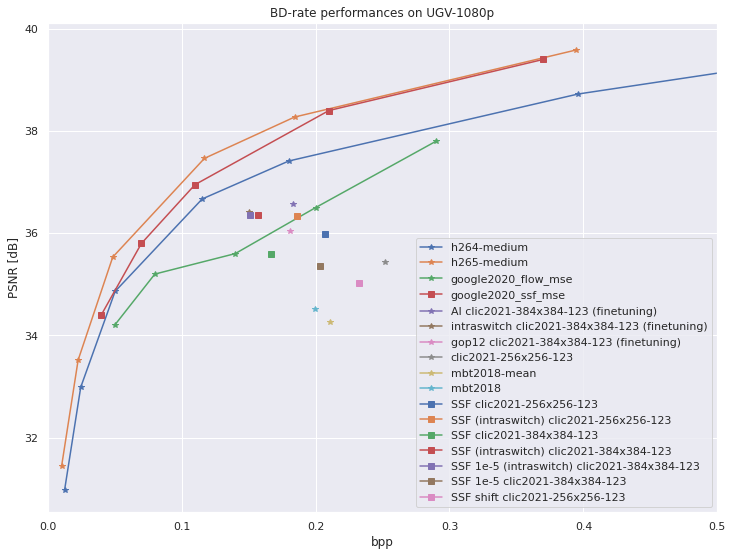

In [14]:
# Plot results
fig, ax = plt.subplots(figsize=(12, 9))
for name, data in results.items():
    marker = '*'
    if 'ssf' in name.lower():
        marker = 's'
    ax.plot(data.get('bpp', []), data.get('rgb_psnr', []), f'{marker}-', label=name)
ax.set_ylabel('PSNR [dB]')
ax.set_xlabel('bpp')
ax.set_xlim(0, 0.5)
ax.title.set_text('BD-rate performances on UGV-1080p')
plt.legend(loc='best')
plt.show()

In [6]:
# import math
# N = 120
# import numpy as np
# r = 5
# fig, axs = plt.subplots(3, 1, figsize=(5, 12))
# s = np.random.randint(0, N)
# xs = [math.sin((i+s)/N*math.pi) ** 2 for i in range(N)]
# axs[0].plot(xs)
# axs[1].plot([np.random.normal(0, r) * x for x in xs])
# axs[2].plot([np.random.normal(0, r) * x for x in xs])
# plt.show()